In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
df = pd.read_csv('/content/Life Expectancy Data.csv')


# Selecting features based on EDA analysis of feature selection technique
features = ['Adult Mortality', 'Schooling', 'Income composition of resources', ' BMI ', 'Alcohol']
X = df[features]
y = df['Life expectancy ']
imputer_y = SimpleImputer(strategy='mean')  # Create a separate imputer for y
y = imputer_y.fit_transform(y.values.reshape(-1, 1))  # Reshape y and impute
y = y.ravel()
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both train and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Displaying regression equation
coefficients = model.coef_
intercept = model.intercept_
equation = f"Life Expectancy = {intercept:.2f}"
for i, coef in enumerate(coefficients):
    equation += f" + {coef:.2f} * {features[i]}"

print(f"\nRegression Equation: {equation}")


R-squared: 0.7272235497128379
Mean Squared Error (MSE): 23.6321
Mean Absolute Error (MAE): 3.3791

Regression Equation: Life Expectancy = 56.31 + -0.03 * Adult Mortality + 0.75 * Schooling + 10.06 * Income composition of resources + 0.07 *  BMI  + 0.10 * Alcohol


In [14]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

   Actual  Predicted
0    73.7  70.597351
1    75.9  76.027741
2    74.2  74.446625
3    76.8  79.676569
4    51.9  54.036869


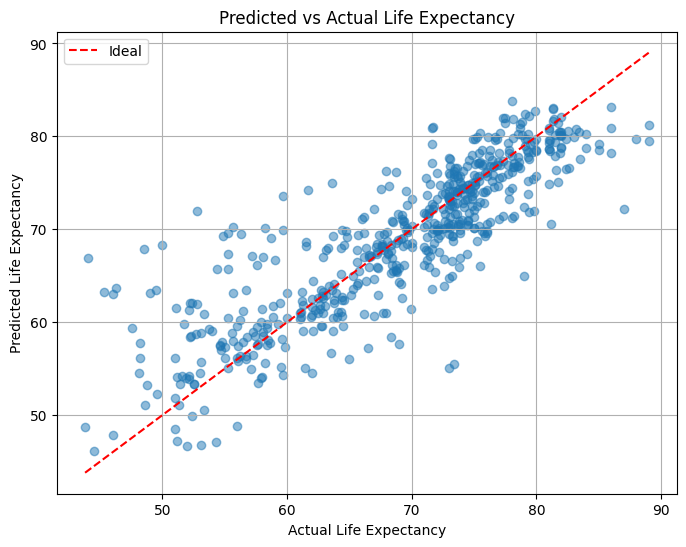

In [16]:
# Visualization: Scatter plot of predicted vs actual values
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Alpha for transparency
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')  # Diagonal line
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Predicted vs Actual Life Expectancy")
plt.legend()
plt.grid(True)
plt.show()